In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

EXPORTING TRAIN,TEST AND TEST SOLUTION DATASETS

In [10]:
import pandas as pd  # Import pandas library and alias it as 'pd'

# Now you can use 'pd' to access pandas functions and objects

train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
display(train_data.head())
print(train_data.shape)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


In [17]:
test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
print(display(test_data.head()))
print(test_data.shape)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


In [18]:
test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
print(display(test_solution_data.head()))
print(test_solution_data.shape)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


Visualizing the distribution of movie genres 

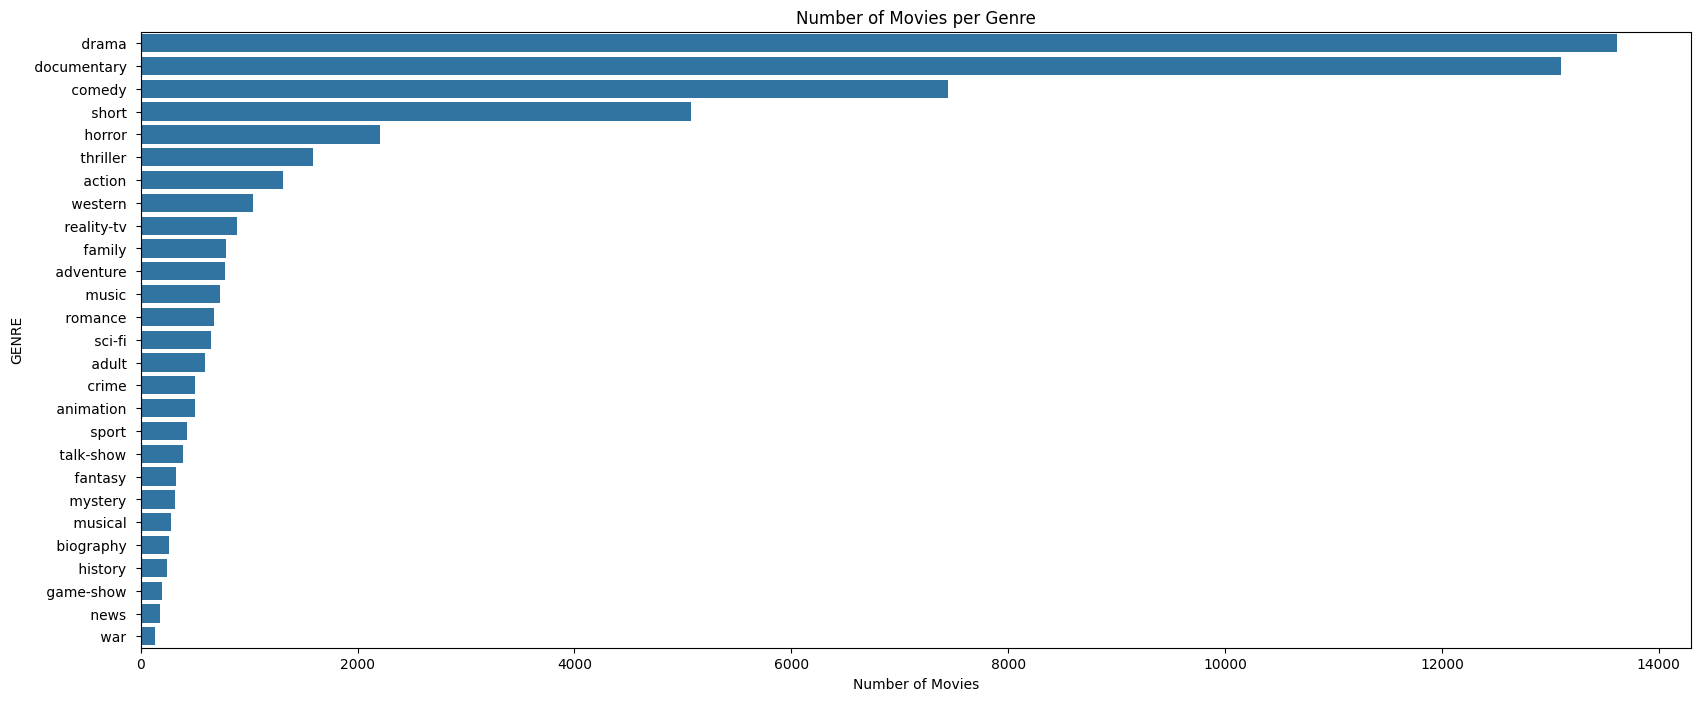

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order=train_data['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.show()


CALCULATING THE TOP 10 MOST FREQUENT GENRES

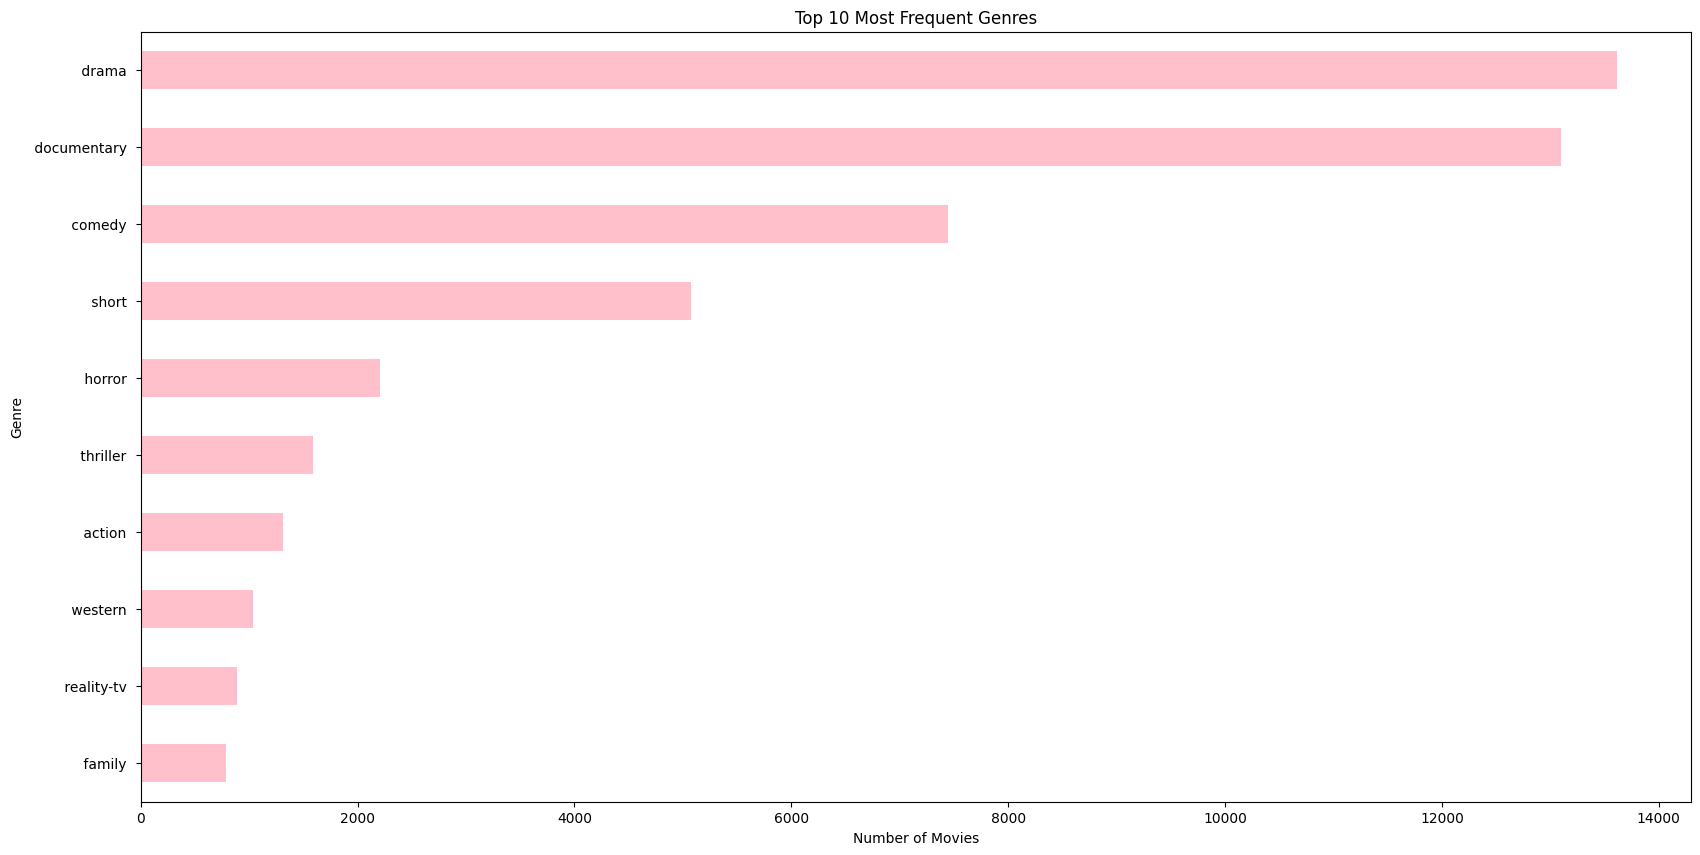

In [39]:
import matplotlib.pyplot as plt 
top_genres = train_data['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='pink')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

**This code performs text classification using a Support Vector Machine (SVM) model, specifically a LinearSVC classifier, on movie descriptions represented as TF-IDF vectors, then evaluates the model's performance on a validation set, reporting accuracy and classification metrics.**

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming train_data, test_data, and test_solution_data are your DataFrames containing the data

# Use the recommended approach to fill missing values in 'DESCRIPTION'
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].fillna("")

# Initialize the TfidfVectorizer with desired parameters
t_v = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the training data
X_train = t_v.fit_transform(train_data['DESCRIPTION'])

# Transform the test data using the same vectorizer
X_test = t_v.transform(test_data['DESCRIPTION'])

# Define and fit the LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

# Split the data into training and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the classifier with dual parameter set explicitly
clf = LinearSVC(dual=False)
clf.fit(X_train_sub, y_train_sub)

# Predict on the validation set
y_val_pred = clf.predict(X_val)

# Calculate and print accuracy and classification report
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy: 0.5391496818223739
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.18      0.24       263
           1       0.42      0.27      0.33       112
           2       0.27      0.09      0.13       139
           3       0.25      0.11      0.15       104
           4       0.00      0.00      0.00        61
           5       0.46      0.47      0.46      1443
           6       0.29      0.06      0.09       107
           7       0.65      0.82      0.72      2659
           8       0.53      0.73      0.61      2697
           9       0.42      0.12      0.19       150
          10       0.10      0.01      0.02        74
          11       0.56      0.50      0.53        40
          12       0.00      0.00      0.00        45
          13       0.49      0.55      0.52       431
          14       0.50      0.45      0.47       144
          15       0.40      0.08      0.13        50
      

**This code predicts the labels for the test data using the trained LinearSVC classifier (`clf`), calculates the accuracy of the predictions compared to the true labels (`y_test`), and prints a classification report containing precision, recall, and F1-score for each class in the test data.**

In [29]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\Users\numas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\numas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\numas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

**This code initializes and trains a Multinomial Naive Bayes classifier (`Mnb_classifier`) using the training data (`X_train` features and `y_train` labels) for text classification tasks.**

In [30]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [31]:
Mnb_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

**This code defines a function `predict_movie` that predicts the genre label for a given movie description using a trained LinearSVC classifier. It transforms the description into a numerical representation, predicts the label, and returns the corresponding genre. Then, it demonstrates the function's usage by predicting the genre for two sample movie descriptions and printing the results.**

In [38]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A group of teenagers battle supernatural forces in a small town "
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie about family and relations"
print(predict_movie(sample_descr_for_movie1))

 horror 
 drama 
